# Load the data

In [1]:
# Import necessary packages
using DrWatson
using JLD2

# Activate the project environment
@quickactivate :FlowComplexity

# Define the file path
file_path = joinpath("./data", "data.jld2")

# Load the data from the specified file
@load file_path sim_array

1-element Vector{Symbol}:
 :sim_array

# Compute time series for 10 species

In [2]:
using DataFrames, Statistics

# Get the length of the array
nsim = length(sim_array)

# Get the first simulation of the array
first_sim = sim_array[1]

# Define the array that will hold our population time series
max_t = Int(first_sim.total_time)
nspecies = 10
pop_array = zeros(Int, nsim, max_t, nspecies)

# Populate the population array
for i in 1:nsim
    sim = sim_array[i]
    time_series_df = FlowComplexity.convert_timeseries_to_tidy_df(sim.time_evolution)
    
    for j in 1:max_t
        for k in 1:nspecies
            filtered_time_series_df = filter(row -> row[:time] == j && row[:variable] == string(k), time_series_df)
            pop_array[i, j, k] = filtered_time_series_df[1, :value]
        end
    end
end

# Calculate the averages
pop_avg_array = dropdims(mean(pop_array, dims=1), dims=1)

# Calculate the standard deviations
pop_std_array = dropdims(std(pop_array, dims=1), dims=1)

100×10 Matrix{Float64}:
 0.0  10.2285   11.1759    5.76965  …  4.93176  5.59861  3.19026  4.83161
 0.0  19.0893   13.5175    9.54289     5.12619  4.11636  3.73571  3.80058
 0.0  15.8707    9.58529   9.2352      6.19677  5.04315  7.80385  3.30151
 0.0  14.5621    8.33733   9.5458      9.36957  4.79467  3.2249   3.92853
 0.0  16.1813    9.7616    7.27553     6.97296  3.77271  4.68568  4.34102
 0.0  19.654    10.4398   11.4387   …  6.05622  3.91578  3.36815  3.89301
 0.0  11.2862    8.71079   6.53622     6.4713   4.45845  4.70106  3.31495
 0.0  17.9988    7.87119   7.63108     6.89928  6.10009  3.92853  3.08401
 0.0  15.3637   12.7388    5.94045     5.3707   4.06749  4.08384  3.28126
 0.0  13.9845    8.36992   9.19481     4.50802  4.36654  3.55278  4.05654
 ⋮                                  ⋱                             
 0.0  14.7588   18.1243    9.00864     4.55095  5.16505  4.60555  4.64758
 0.0  23.2113   15.4089    8.88757     3.35989  4.74225  3.49762  3.29309
 0.0  16.4506   11.86

# Plot the figure

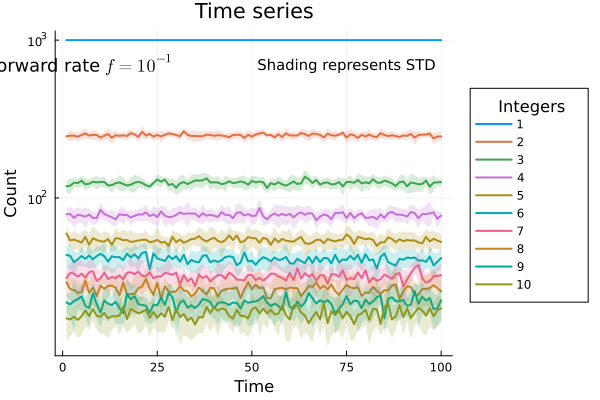

"/Users/alexandre/Documents/academic/3-research/projects/2023 spatial-topology/flow-complexity/milestones/01_time-series/f=0.1/figs/time-series.pdf"

In [3]:
using Plots
using LaTeXStrings
using FileIO

# Create plot with basic settings
p = plot(
    title="Time series",
    xlabel="Time",
    ylabel="Count",
    yaxis=:log10,
    legendtitle="Integers",
    legend=:outerright
)

# Plot data for each species
for i in 1:nspecies
    plot!(
        p,
        1:max_t,
        pop_avg_array[:, i],
        lw=2,
        ribbon=pop_std_array[:, i],
        fillalpha=0.2,
        label="$i"
    )
end

# Add annotation
annotate!(5, 700, text("Forward rate " * L"f=10^{-1}", :black, 12))
annotate!(75, 700, text("Shading represents STD", :black, 10))

# Display and save plot
display(p)
mkpath("figs")
savefig("figs/time-series.pdf")

# Compute species distribution at time $t$

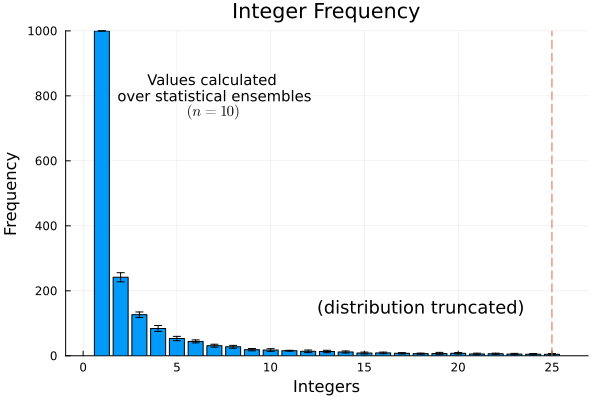

"/Users/alexandre/Documents/academic/3-research/projects/2023 spatial-topology/flow-complexity/milestones/01_time-series/f=0.1/figs/hist.pdf"

In [5]:
using DataFrames, Statistics, Plots, LaTeXStrings, FileIO

t = 10
nsim = length(sim_array)
hist = zeros(Int, 100000, nsim)

for i in 1:nsim
    sim = sim_array[i]
    time_series_df = FlowComplexity.convert_timeseries_to_tidy_df(sim.time_evolution)

    filtered_time_series_df = filter(row -> row[:time] == t, time_series_df)
    for j in 1:nrow(filtered_time_series_df)
        var = filtered_time_series_df[j, :variable]
        var = parse(Int, var) # because variables are stored as strings
        val = filtered_time_series_df[j, :value]
        hist[var, i] = val
    end
end

mu = zeros(Int, 100000)
sig = zeros(Int, 100000)

mu = mean(hist, dims=2)
sig = std(hist, dims=2)

h = mu[1:25]
bin_labels = 1:length(h)  # Labels for each bin

# Create plot with basic settings
b = bar(
    title="Integer Frequency",
    xlabel="Integers",
    ylabel="Frequency",
    legend=false
)

bar!(bin_labels, h, yerr=sig)
annotate!(7, 800, text("Values calculated \n over statistical ensembles \n" * L"(n=10)", :black, 10))
annotate!(18, 150, text("(distribution truncated)", :black, 12))
vline!([25], linestyle=:dash)

# Display and save plot
display(b)
mkpath("figs")
savefig("figs/hist.pdf")